### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

#### The independent variable is: the word type or condition (congruent or incongruent)

#### The dependent variable is: the response time


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

### The test hypothesis: 

#### 1- The null hypothesis: 
the word type has no effect on the response time, that the mean response time for congruent words is the same as the mean response time for incongrurnt words.

#### 2- The alternative hypothesis: 
the word type has an effect on the response time, hat the mean response time for incongruent words is not the same as the mean response time for incongrurnt words.

#### In mathematical notation:
                
                H0: cong_mean = incong_mean
                H1: cong_mean ≠ incong_mean
             OR
                H0: μ_c = μ_inc 
                H1: μ_c ≠ μ_inc
                
                Where: 
                      μ_c: is the mean response time for congurent words
                       
                      μ_inc: is the mean response time for incongurent words

### Then what test should we carry in our case?!

Here, we have:

1- Sample size is below 30 (24 entries)

2- The same participant is measured at two time points.

3- We don't know the population standard deviation.

Therefore, we will conduct a 'Dependent t-test for Paired Samples', (or what we call a 'two-tailed paired t-test'), because we want to see if there are any changes in the reading time if the data is displayed congruent or incongruent as we want to measure two different treatments on a persons reaction to see if there is a difference in the reaction time.


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [ ]:
# Perform the analysis here

In [7]:
#Importing the required libraries and read our dataset
import pandas as pd
import math
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t
%matplotlib inline

UsageError: Line magic function `%latex` not found (But cell magic `%%latex` exists, did you mean that instead?).


In [2]:
#Read our dataset
df = pd.read_csv('stroopdata.csv')

df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
#running statistic summary for our data
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### The mean and standard deviation for both congrunet and incongruent data are:

#### 1- Congruent:

   Mean: 14.051125 sec
   
   Satndard deviation: 3.559358 sec
   
#### 2- Incongruent:

   Mean: 22.015917 sec
   
   Satndard deviation: 4.797057 sec
  
   
#### Notes: we note that both mean and standard deviation for incongurent data are greater than those for congruent data, especially the mean has a significant difference.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [39]:
# Build the visualizations here

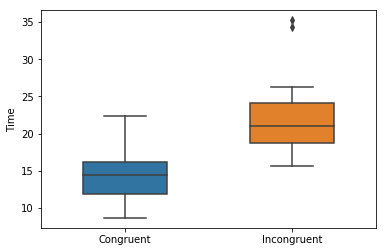

In [38]:
sns.boxplot(data = df[['Congruent', 'Incongruent']], width = 0.5);
plt.ylabel("Time");



#### Notes: we can see that the time statics parameters is higher fo incongurent than congurent and that is logical ... The mind takes more time to process incongurent data.

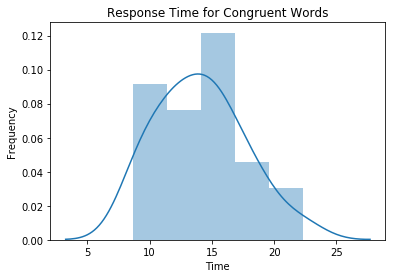

In [20]:
#Plot a Graph for congruent dataset
sns.distplot(df['Congruent'])
plt.xlabel("Time");
plt.ylabel("Frequency");
plt.title("Response Time for Congruent Words");

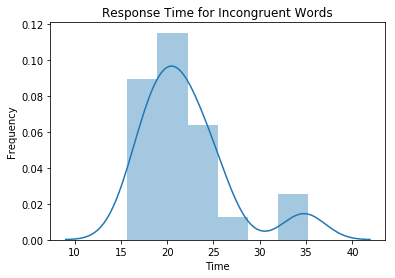

In [23]:
#Plot a Graph for incongruent dataset
sns.distplot(df['Incongruent'])
plt.xlabel("Time");
plt.ylabel("Frequency");
plt.title("Response Time for Incongruent Words");

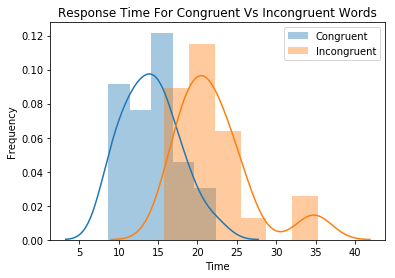

In [29]:
#Compare Both the datasets and make a graph
sns.distplot(df['Congruent'],label = "Congruent")
sns.distplot(df['Incongruent'],label = "Incongruent")
plt.xlabel("Time");
plt.ylabel("Frequency");
plt.title("Response Time For Congruent Vs Incongruent Words");
plt.legend();

#### Notes: Both the distribution are looks like the normal distribution and we can see that the mean is different for both the distributions.


(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [23]:
#find t-critical value for 95% confidance interval and 23 degree of freedom for two tailed test

T_critical = t.ppf(0.975,23)
T_critical

2.0686576104190406

In [4]:
#performint a t_ test
stats.ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

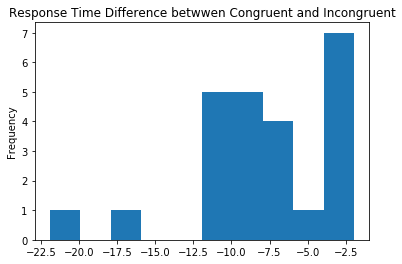

In [7]:
#now exploring the difference data
df['response_time_diff'] = df['Congruent'] - df['Incongruent']

df['response_time_diff'].plot(kind = 'hist', title = 'Response Time Difference betwwen Congruent and Incongruent');


In [10]:
diff_mean = df['Congruent'].mean() - df['Incongruent'].mean()
diff_mean

-7.9647916666666667

In [9]:
diff_std = df['response_time_diff'].std()
diff_std

4.8648269103590556

In [14]:
# Calculate the T-value
T_value = diff_mean / (diff_std/ math.sqrt(24))
T_value

-8.020706944109957

### For two tailed t-test at 95% confidence level:

Sample size(n) = 24

Degree Of Freedom(df) = 23

T-critical (tcritical) = ∓2.069

Standerd Deviation(SD) = 4.8648

Mean of difference data (x̄) = -7.9648

### Notes: 

1- The null hypothesis will be rejected. 
There is a significant difference between mean time used in both conditions (congruent & incongruent) for each participant at 0.05 significance level as our p-value is to low as it approached (0) approximately.

2-The results did match up with my expectations. My personal experiences were that I took longer and made more mistakes when I trained on the incongruent data set. I think the incongruent data set is harder to interpret because the brain uses separate modules for processing color and for processing writing.


(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

### There are many theories developed can account for this occurrence:

Two theories developed by J. Ridley Stroop can account for this occurrence:

1. Speed of Processing Theory: He showed that the Interference occurs because, people are able to read words much quicker and to name the colour of the word is much more complex.

2. Selective Attention Theory: Interference occurs because; naming the actual colour of the words requires much more attention than reading the words.

Note: there are two more theories (Automaticity, Parallel distributed processing), but I find that they are both self_explained through J.Ridley Stroop theories.


## References:

1- Stroop Effect/wikipedia: https://en.wikipedia.org/wiki/Stroop_effect

2- How to Calculate Critical Values for Statistical Hypothesis Testing with Python:
   https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/
   
3- J. Ridley Stroop/ wikipedia:
  https://en.wikipedia.org/wiki/John_Ridley_Stroop#Academic_career
  
4- How to understand degrees of freedom?
  https://stats.stackexchange.com/questions/16921/how-to-understand-degrees-of-freedom
  
5- GitHup Site 